# Mountain Lee Waves

### Linear Model

Single equation for vertical velocity is
## $$ \frac{\partial^2w}{\partial x^2} + \frac{\partial^2w}{\partial z^2} + \ell^2 w= 0$$

where x is the horizontal coordinate perpendicular to the ridgeline, z is the vertical component, and

## $$ \ell^2 = \frac{N^2}{U^2} - \frac{1}{U} \frac{d^2 U}{dz^2} $$

is the Scorer parameter where U(z) is the speed of basic state flow and N(z) is the buoyancy frequency. This can be defined as:

## $$ N^2 = \frac{g}{\theta_0} \frac{d\bar\theta}{dz} $$

Where \bar theta(z) is the basic-state potential temperature and theta_0 is a constant reference potential temperature

Lower BC:
In order to assure the physical relevance of mathematical solutions to (1) in the infinitely deep atmosphere, those solutions must satisfy one of two possible conditions: either (i) the perturbation energy density must approach zero as z → ∞, or (ii) if the perturbation energy density is finite as z → ∞, then the perturbation energy flux associated with each individual vertically propagating mode must be upward.

## $$ w(x, z) = \bar w_1(z)\cos kx + \bar w_2 (z) \sin kx $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Define Boundaries

In [3]:
dx = 1*1000
xf = 100*1000
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1*1000
zf = 9*1000
z = np.arange(0, zf+1, dz)
#print(z)

In [4]:
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
#print(z)

### Energy Dissipation with Height

1010


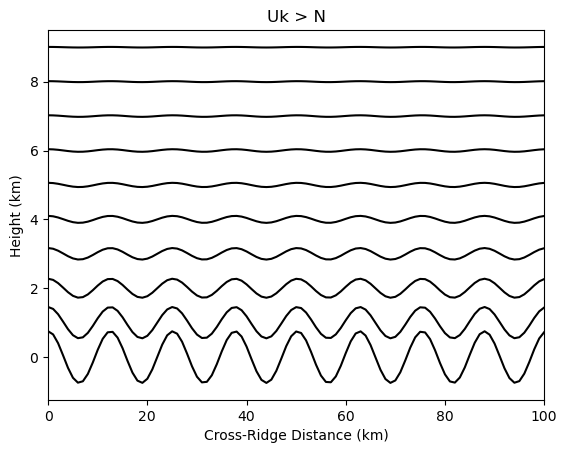

In [5]:
U = 15 #m/s^2
N = 0.01 #1/s
l = N / U
k = 0.5 #smaller is wavier
mu = np.sqrt(k**2 - l**2)

h0 = 0.1

# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega(x, z):
    return U * h0 * k * np.exp(-mu*z) * np.cos(k*x)

omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega(xx, zz)+z[i])
print(len(omegalist))
def plot(dz):
    if dz == 1000:
        plt.plot(x, omegalist[:101], c='black')     # Ground
        plt.plot(x, omegalist[101:202], c='black')  # 1km
        plt.plot(x, omegalist[202:303], c='black')  # 2km
        plt.plot(x, omegalist[303:404], c='black')  # 3km
        plt.plot(x, omegalist[404:505], c='black')  # 4km
        plt.plot(x, omegalist[505:606], c='black')  # 5km
        plt.plot(x, omegalist[606:707], c='black')  # 6km
        plt.plot(x, omegalist[707:808], c='black')  # 7km
        plt.plot(x, omegalist[808:909], c='black')  # 8km
        plt.plot(x, omegalist[909:1010], c='black')  # 9km
        
        plt.title('Uk > N')
        plt.xlabel('Cross-Ridge Distance (km)')
        plt.ylabel('Height (km)')
        plt.margins(x=0)
        

    elif dz == 500:
        plt.plot(x, omegalist[:201], c='black')
        plt.plot(x, omegalist[201:402], c='black')
        plt.plot(x, omegalist[402:603], c='black')
        plt.plot(x, omegalist[603:804], c='black')
        plt.plot(x, omegalist[804:1005], c='black')
        plt.plot(x, omegalist[1005:1206], c='black')
    else:
        print('Not Valid Input')
        
        
plot(1000)

### Energy Propagation Upstream

4.444444444444445e-07


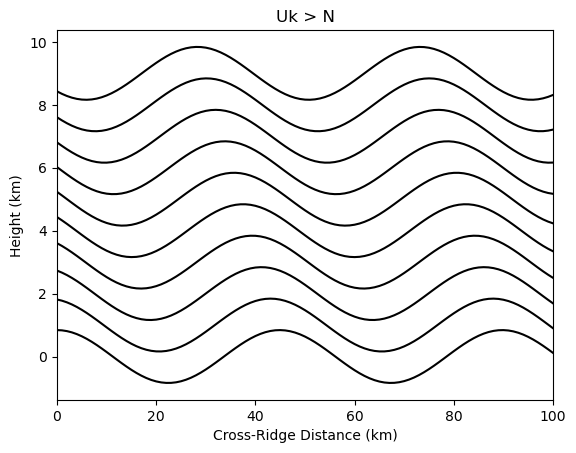

In [6]:
U = 15 #m/s^2
N = 0.01 #1/s
l2 = N**2 / U**2
print(l2)
k = 0.0014 # controls wavelength
v = (l - k**2)**(1/2)

h0 = 40

# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega7(x, z):
    return U * h0 * k * np.cos(k*x*100 + v*z*10)

omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega7(xx, zz)+z[i])
        
plot(1000)

### Work in Progress for Solving Through Equation

In [9]:
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
n = len(x)
#print(z)

D = 0.1
C_d = D * dx / dz**2

W = np.zeros([n, len(x)]) # creation of J matrix
# NEED INITIAL CONDITION

for i in np.arange(len(z)-1):
    for k in np.arange(len(x)-1):
        W[i, k+1] = W[i, k] + (C_d*(W[i+1, k] - 2*W[i, k] + W[i-1, k]))